In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from skimage.segmentation import felzenszwalb, slic, random_walker
from skimage.segmentation import mark_boundaries, find_boundaries, relabel_sequential
from skimage.color import label2rgb

In [25]:
image = cv2.imread("train_images/add_03.jpg")
mask_image = cv2.imread("train_masks/add_03.png",0)

In [26]:
# Binarize input image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_,binarized_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_OTSU)
#binarized_image = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)


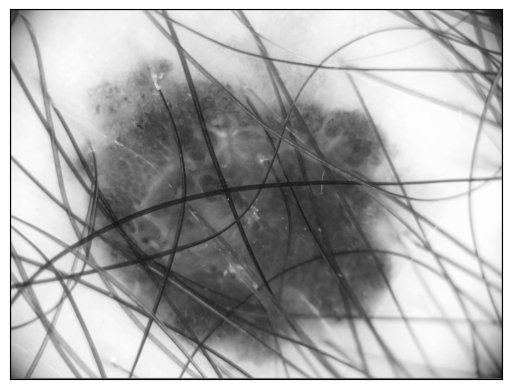

In [49]:
plt.imshow(gray_image,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

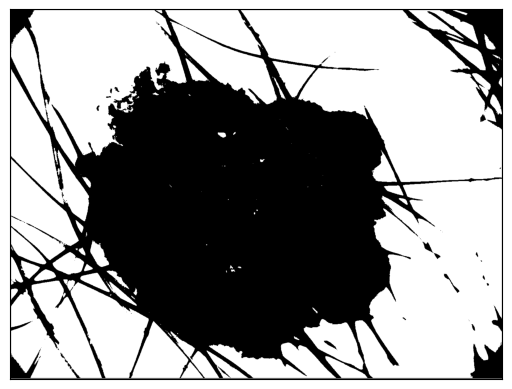

In [27]:
plt.imshow(binarized_image,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
#Define boundary rectangle containing the foreground object
height, width = binarized_image.shape
left_margin_proportion = 0.2
right_margin_proportion = 0.2
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)

number_of_iterations = 10

In [29]:
# Initialize the mask with known information
mask = np.zeros((height, width), np.uint8)
mask[:] = cv2.GC_PR_BGD
mask[binarized_image == 0] = cv2.GC_FGD

In [30]:
# Arrays used by the algorithm internally
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

cv2.grabCut(
    image,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    number_of_iterations,
    cv2.GC_INIT_WITH_MASK,
)

(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 1, 1, ..., 1, 1, 2],
        [2, 1, 1, ..., 1, 1, 2],
        ...,
        [2, 1, 1, ..., 1, 1, 2],
        [2, 1, 1, ..., 1, 1, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[ 4.60030675e-01,  5.17094950e-02,  1.16261984e-01,
          2.64346524e-01,  1.07651322e-01,  2.53969301e+02,
          2.45940356e+02,  2.43104296e+02,  1.89576611e+02,
          1.82343635e+02,  1.92014087e+02,  2.23982811e+02,
          2.17997434e+02,  2.28136715e+02,  2.46551622e+02,
          2.34072517e+02,  2.33282198e+02,  2.34662642e+02,
          2.11564383e+02,  2.07755126e+02,  1.61929372e+00,
          7.59174328e-01, -6.59342582e-01,  7.59174328e-01,
          1.95469340e+01,  2.09152672e+01, -6.59342582e-01,
          2.09152672e+01,  2.97389005e+01,  2.07422916e+02,
          1.05847516e+02,  5.25107153e+01,  1.05847516e+02,
          1.09682789e+02,  1.11577994e+02,  5.25107153e+01,
          1.11577994e+02,  2.19799917e+02,  1.14755737

In [12]:
grabcut_mask = np.where((mask == cv2.GC_PR_BGD) | (mask == cv2.GC_BGD), 0, 1).astype(
    "uint8"
)
segmented_image = image.copy() * grabcut_mask[:, :, np.newaxis]

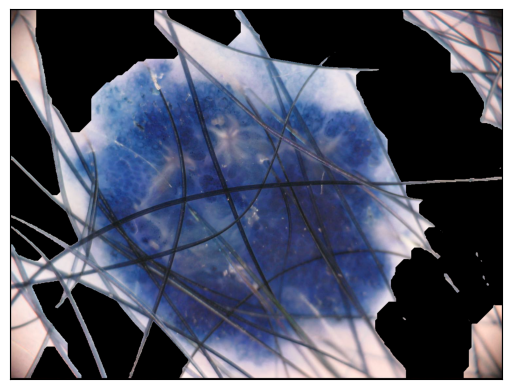

In [13]:
#_,segmented_image = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_OTSU)
plt.imshow(segmented_image), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
new = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

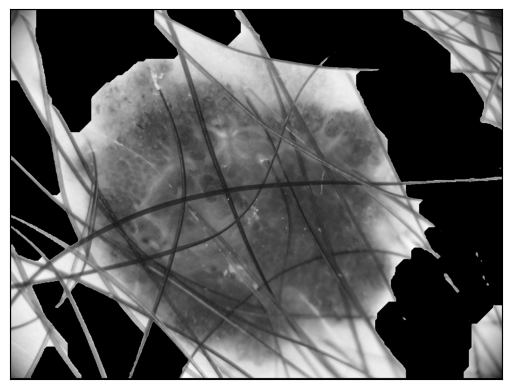

In [15]:
#_,segmented_image = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_OTSU)
plt.imshow(new,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
_,new2 = cv2.threshold(new, 128, 255, cv2.THRESH_OTSU)

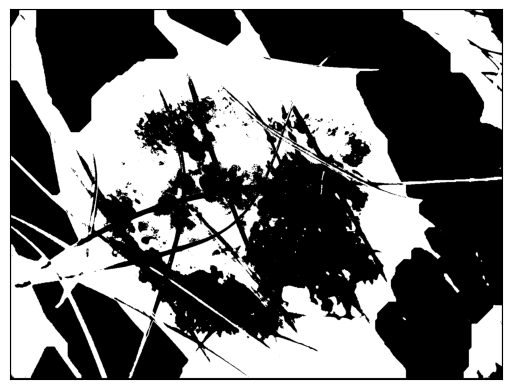

In [17]:
#_,segmented_image = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_OTSU)
plt.imshow(new2,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
from sklearn.metrics import precision_score,recall_score,jaccard_score
jaccard_score(mask.reshape(-1),new2.reshape(-1),pos_label=255)

0.3381549002999623

In [45]:
def segmentImage(img):
    # Inputs
    # img: Input image, a 3D numpy array of row*col*3 in BGR format
    #
    # Output
    # outImg: segmentation image
    #
    #########################################################################
    # ADD YOUR CODE BELOW THIS LINE
   
    # Binarize input image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _,binarized_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_OTSU)    

    #Define boundary rectangle containing the foreground object
    height, width = binarized_image.shape
    left_margin_proportion = 0.2
    right_margin_proportion = 0.2
    up_margin_proportion = 0.1
    down_margin_proportion = 0.1
    
    boundary_rectangle = (
        int(width * left_margin_proportion),
        int(height * up_margin_proportion),
        int(width * (1 - right_margin_proportion)),
        int(height * (1 - down_margin_proportion)),
    )
    
    number_of_iterations = 10

    # Initialize the mask with known information
    mask = np.zeros((height, width), np.uint8)
    mask[:] = cv2.GC_PR_BGD
    mask[binarized_image == 0] = cv2.GC_FGD

    # Arrays used by the algorithm internally
    background_model = np.zeros((1, 65), np.float64)
    foreground_model = np.zeros((1, 65), np.float64)
    
    cv2.grabCut(
        image,
        mask,
        boundary_rectangle,
        background_model,
        foreground_model,
        number_of_iterations,
        cv2.GC_INIT_WITH_MASK,
    )

    grabcut_mask = np.where((mask == cv2.GC_PR_BGD) | (mask == cv2.GC_BGD), 0, 1).astype(
    "uint8"
    )
    segmented_image = image.copy() * grabcut_mask[:, :, np.newaxis]

    new = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    _,outImg = cv2.threshold(new, 128, 255, cv2.THRESH_OTSU)

    outImg = cv2.cvtColor(outImg, cv2.COLOR_GRAY2BGR)
    
    
    # END OF YOUR CODE
    #########################################################################
    return outImg

In [46]:
x=segmentImage(image)

In [47]:
x.shape

(1129, 1504, 3)

In [48]:
y = cv2.cvtColor(x, cv2.COLOR_GRAY2BGR)
y.shape

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3
